# Topic Survey Assignment

## Assignment Desctription
In this Assignment, you will demonstrate the data visualization skills you learned by completing this course. You will be required to generate two visualization plots. The first one will be a plot to summarize the results of a survey that was conducted to gauge an audience interest in different data science topics. The second plot is a Choropleth map of the crime rate in San Francisco.

Please note that this assignment is worth 20% of your final grade.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

## Description of the Data
A survey was conducted to gauge an audience interest in different data science topics, namely:

1. Big Data (Spark / Hadoop)
2. Data Analysis / Statistics
3. Data Journalism
4. Data Visualization
5. Deep Learning
6. Machine Learning

The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. 2,233 respondents completed the survey.

The survey results have been saved in a csv file and can be accessed through this link: [Topic_Survey_Assignment](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Topic_Survey_Assignment.csv)

## Question 1
If you examine the csv file, you will find that the first column represents the data science topics and the first row represents the choices for each topic.

Use the pandas read_csv method to read the csv file into a pandas dataframe, that looks like the following:

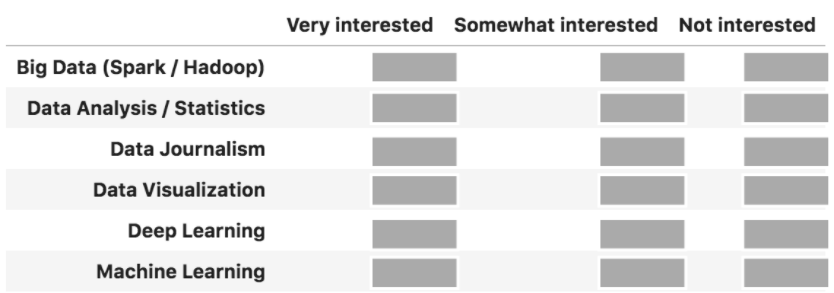

In order to read the data into a dataframe like the above, one way to do that is to use the index_col parameter in order to load the first column as the index of the dataframe. Here is the documentation on the pandas read_csv method: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

Once you have succeeded in creating the above dataframe, please upload a screenshot of your dataframe with the actual numbers. (5 marks)

In [45]:
df_surv = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Topic_Survey_Assignment.csv')
df_surv

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


## Question 2
Use the artist layer of Matplotlib to replicate the bar chart below to visualize the percentage of the respondents' interest in the different data science topics surveyed.

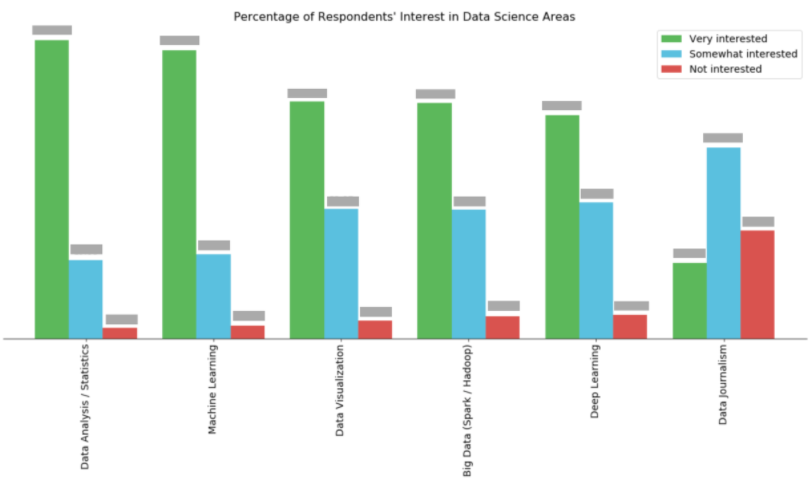

To create this bar chart, you can follow the following steps:

1. Sort the dataframe in descending order of Very interested.
2. Convert the numbers into percentages of the total number of respondents. Recall that 2,233 respondents completed the survey. Round percentages to 2 decimal places.
3. As for the chart...


- use a figure size of (20, 8),
- bar width of 0.8,
- use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,
- use font size 14 for the bar labels, percentages, and legend,
- use font size 16 for the title, and,
- display the percentages above the bars as shown above, and remove the left, top, and right borders.

Once you are satisfied with your chart, please upload a screenshot of your plot. (5 marks)

In [46]:
# 1. Sort the dataframe in descending order of Very interested.
df_surv.sort_values(['Very interested'], ascending = False, inplace = True)

In [47]:
# 2. Convert the numbers into percentages, round.
df_surv = df_surv/2233
df_surv = df_surv.round(decimals = 4)
df_surv

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,0.7559,0.1988,0.0269
Machine Learning,0.7295,0.2136,0.0331
Data Visualization,0.6001,0.3287,0.0457
Big Data (Spark / Hadoop),0.5965,0.3265,0.0569
Deep Learning,0.5656,0.3448,0.0609
Data Journalism,0.1921,0.4841,0.2732


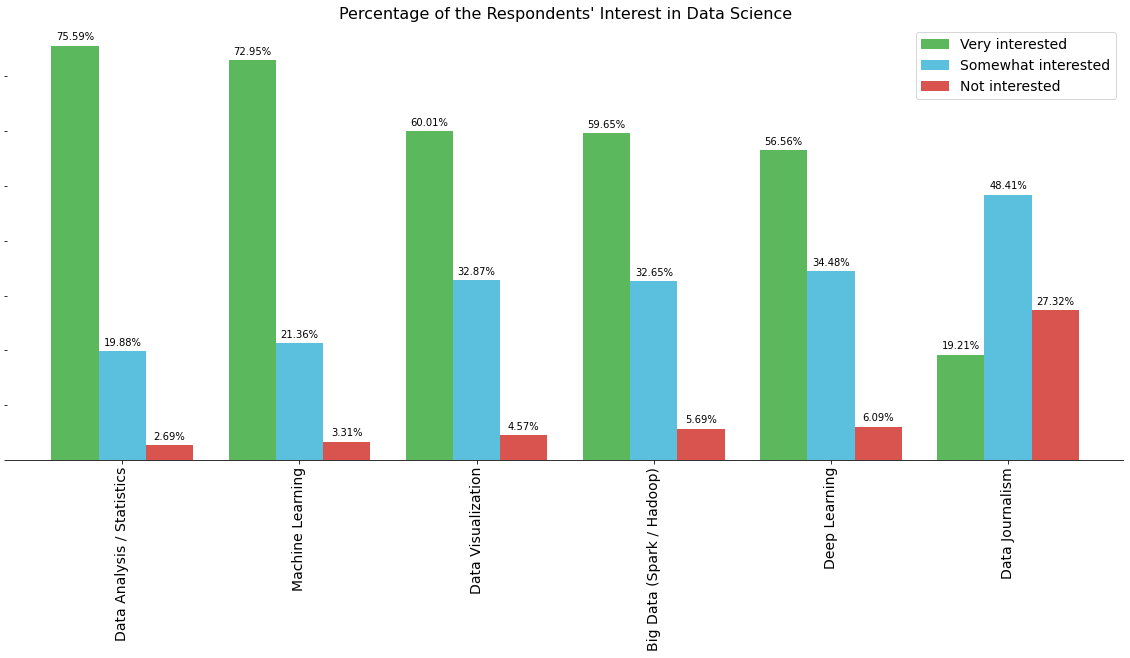

In [50]:
#3 Create Bar Chart
ax = df_surv.plot(kind = 'bar',
                 figsize = (20, 8), # use a figure size of (20, 8)
                 width = (0.8), # bar width of 0.8
                 color = ['#5cb85c', '#5bc0de', '#d9534f'], # use color '#5cb85c', '#5bc0de', '#d9534f'
                 )

# use font size 14 for the bar labels, percentages, and legend,
ax.set_yticklabels([]) #Not asked for but now like the picture
ax.set_xticklabels(df_surv.index, fontsize = 14)
ax.legend(fontsize = 14)
# use font size 16 for the title, and,
ax.set_title('Percentage of the Respondents\' Interest in Data Science', fontsize = 16)
# display the percentages above the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height+.01), ha='center')
# remove the left, top, and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

## Question 3 
In the final lab, we created a map with markers to explore crime rate in San Francisco, California. In this question, you are required to create a Choropleth map to visualize crime in San Francisco.

Before you are ready to start building the map, let's restructure the data so that it is in the right format for the Choropleth map. Essentially, you will need to create a dataframe that lists each neighborhood in San Francisco along with the corresponding total number of crimes(including all the 39 crime type categories).

Based on the San Francisco crime dataset, you will find that San Francisco consists of 10 main neighborhoods, namely:

1. Central,
2. Southern,
3. Bayview,
4. Mission,
5. Park,
6. Richmond,
7. Ingleside,
8. Taraval,
9. Northern, and,
10. Tenderloin.

Convert the San Francisco dataset, which you can also find here, [San Francisco dataset](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Police_Department_Incidents_-_Previous_Year__2016_.zip) , into a pandas dataframe, like the one shown below, that represents the total number of crimes in each neighborhood.

Paste  this link in the browser and download the zip file. 

Extract the csv file from the zip file.

Later upload the csv file to skills lab and use it.

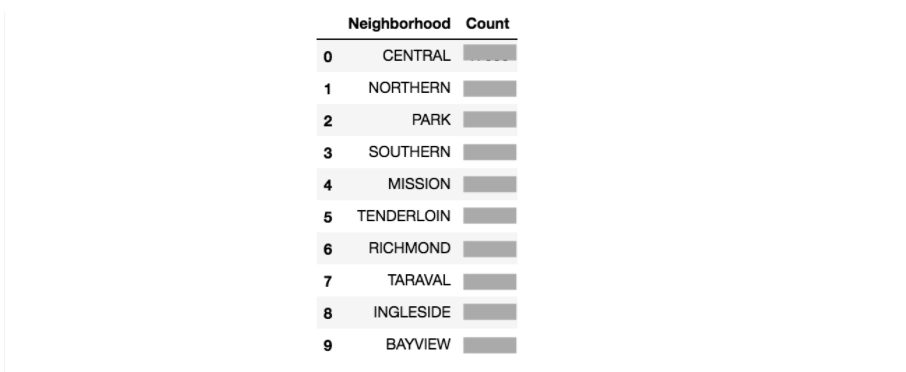

Once you are happy with your dataframe, upload a screenshot of your pandas dataframe. (5 marks)

In [51]:
import zipfile

In [68]:
# zipped = zipfile.ZipFile('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Police_Department_Incidents_-_Previous_Year__2016_.zip')
# df_Police = pd.read_csv(zf.open('Police_Department_Incidents_-_Previous_Year__2016_.csv')

# Link broken, instructed to use following link to .csv
df_Police = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv")
df_Police.drop(['IncidntNum', 'DayOfWeek', 'Date', 'Time', 'Resolution'] , axis=1, inplace = True)
df_Police

,Category,Descript,PdDistrict,Address,X,Y,Location,PdId
0,WEAPON LAWS,POSS OF PROHIBITED WEAPON,SOUTHERN,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",SOUTHERN,800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,WARRANTS,WARRANT ARREST,BAYVIEW,KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,NON-CRIMINAL,LOST PROPERTY,TENDERLOIN,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,NON-CRIMINAL,LOST PROPERTY,MISSION,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...
150495,ASSAULT,BATTERY,PARK,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134
150496,NON-CRIMINAL,LOST PROPERTY,CENTRAL,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",17600074271000
150497,LARCENY/THEFT,PETTY THEFT OF PROPERTY,CENTRAL,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372
150498,LARCENY/THEFT,GRAND THEFT OF PROPERTY,CENTRAL,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",17600076406374


In [72]:
df_hoods = df_Police.groupby('PdDistrict', axis=0).sum()
df_hoods

,X,Y,PdId
PdDistrict,,,
BAYVIEW,-1.750596e+06,5.397948e+05,230684177206010976
CENTRAL,-2.162486e+06,6.677199e+05,286294600805716736
INGLESIDE,-1.419448e+06,4.374095e+05,186916092875358944
MISSION,-2.387548e+06,7.364392e+05,314170008462290624
NORTHERN,-2.460782e+06,7.595115e+05,325733560323076608
PARK,-1.065155e+06,3.285639e+05,140570048345056768
RICHMOND,-1.092710e+06,3.370677e+05,144422189222055712
SOUTHERN,-3.481817e+06,1.074647e+06,460628752710720000
TARAVAL,-1.387062e+06,4.273873e+05,183068181660870496


In [55]:
df_Police = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv")
df_Police

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,161061000,ASSAULT,BATTERY,Friday,12/30/2016 12:00:00 AM,21:01,PARK,NONE,OAK ST / STANYAN ST,-122.453982,37.771428,"(37.7714278595913, -122.453981622365)",16106100004134
150496,176000742,NON-CRIMINAL,LOST PROPERTY,Friday,12/30/2016 12:00:00 AM,08:00,CENTRAL,NONE,JACKSON ST / SANSOME ST,-122.401857,37.796626,"(37.7966261239618, -122.401857374739)",17600074271000
150497,176000758,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,12/29/2016 12:00:00 AM,20:00,CENTRAL,NONE,PINE ST / TAYLOR ST,-122.412269,37.790673,"(37.7906727649886, -122.41226909106)",17600075806372
150498,176000764,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Friday,12/30/2016 12:00:00 AM,10:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406659,37.788275,"(37.7882745285785, -122.406658711008)",17600076406374


## Question 4
Now you should be ready to proceed with creating the Choropleth map.

As you learned in the Choropleth maps lab, you will need a GeoJSON file that marks the boundaries of the different neighborhoods in San Francisco. In order to save you the hassle of looking for the right file, I already downloaded it for you and I am making it available via this link: GeoJSON

For the map, make sure that:

- it is centred around San Francisco,
- you use a zoom level of 12,
- you use fill_color = 'YlOrRd',
- you define fill_opacity = 0.7,
- you define line_opacity=0.2, and,
- you define a legend and use the default threshold scale.

If you follow the lab on Choropleth maps and use the GeoJSON correctly, you should be able to generate the following map:

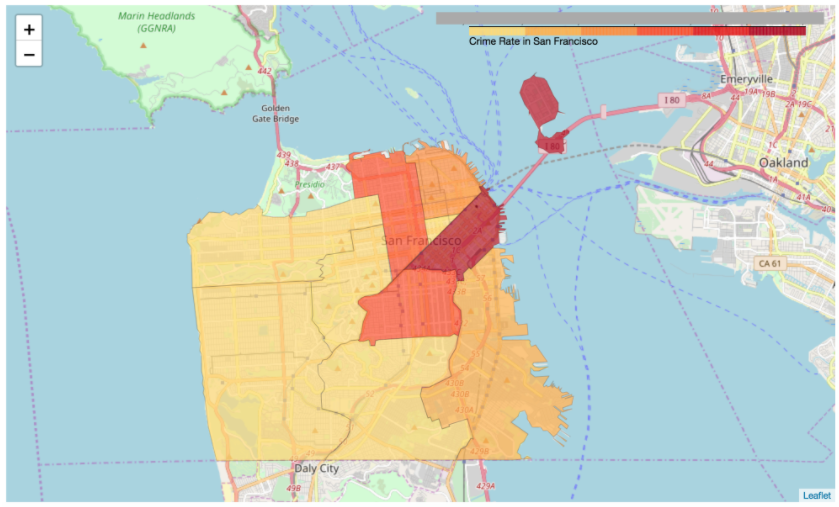

Once you are ready to submit your map, please upload a screenshot of your Choropleth map. (5 marks)